In [1]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt
import json
import requests

/tmpdata/ipykernel_75193/425892065.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
version = '20231215'
download_base = '../abc_download_root'

use_local_cache = False
manifest_path = 'releases/%s/manifest.json' % version

if not use_local_cache :
    url = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/' + manifest_path
    manifest = json.loads(requests.get(url).text)
else :
    file = os.path.join(download_base,manifest_path)
    with open(file,'rb') as f:
        manifest = json.load(f)
    
metadata = manifest['file_listing']['WMB-10X']['metadata']

In [3]:
view_directory = os.path.join( download_base, 
                               manifest['directory_listing']['WMB-10X']['directories']['metadata']['relative_path'], 
                              'views')
cache_views = False
if cache_views :
    os.makedirs( view_directory, exist_ok=True )

In [4]:
#400万细胞的总数据

In [5]:
rpath = metadata['cell_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell = pd.read_csv(file, dtype={'cell_label':str})
cell.set_index('cell_label',inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  4042976


,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,donor_sex,dataset_label,x,y,cluster_alias
cell_label,,,,,,,,,,,,,,,
GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.146826,-3.086639,1
AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.138481,-3.022000,1
AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.472557,-2.992709,1
CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.379622,-3.043442,1
AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.909480,-2.601536,1


In [6]:
#定义了一个函数用来统计每一列的元素数量

In [7]:
def print_column_info(df) :
    
    for c in df.columns :
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30 :
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped),members))
        

In [8]:
#整合了更多文件中的meta信息

In [9]:
taxonomy_metadata = manifest['file_listing']['WMB-taxonomy']['metadata']

In [10]:
rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_pivoted']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_details = pd.read_csv(file,keep_default_na=False)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details.head(5)

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2


In [11]:
rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_color']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_colors = pd.read_csv(file)
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_colors.head(5)

,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cluster_alias,,,,,
1,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F
2,#2B93DF,#FA0087,#0F6632,#266DFF,#CCA73D
3,#2B93DF,#FA0087,#0F6632,#002BCC,#99000D
4,#2B93DF,#FA0087,#0F6632,#002BCC,#5C8899
5,#2B93DF,#FA0087,#0F6632,#002BCC,#473D66


In [12]:
rpath = metadata['region_of_interest_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
roi = pd.read_csv(file)
roi.set_index('acronym',inplace=True)
roi.rename(columns={'order':'region_of_interest_order','color_hex_triplet':'region_of_interest_color'},inplace=True)
roi.head(5)

,label,name,region_of_interest_order,region_of_interest_color
acronym,,,,
MO-FRP,WMB-MO-FRP,Somatomotor - Frontal pole,0,#3DCC7C
MOp,WMB-MOp,Primary motor area,1,#179968
SS-GU-VISC,WMB-SS-GU-VISC,Somatosensory/gustatory/visceral areas,2,#2E8599
SSp,WMB-SSp,Primary somatosensory area,3,#5CCCCC
AUD,WMB-AUD,Auditory areas,4,#455A99


In [13]:
#主要在这一段，上面都是展示表格

In [14]:
cell_extended = cell.join(cluster_details,on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors,on='cluster_alias')
cell_extended = cell_extended.join(roi[['region_of_interest_order','region_of_interest_color']],on='region_of_interest_acronym')
cell_extended.head(5)

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C
AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F,15,#CCB05C


In [15]:
# target_labels = ['WMB-10Xv2-CTXsp', 'WMB-10Xv2-HPF', 'WMB-10Xv3-CTXsp', 'WMB-10Xv3-HPF']
# condition = cell_extended['feature_matrix_label'].isin(target_labels)

# filtered_rows = cell_extended[condition]

In [16]:
# target_labels = ['Glut']
# condition = filtered_rows['neurotransmitter'].isin(target_labels)

# filtered_rows2 = filtered_rows[condition]

# print_column_info(filtered_rows2)

In [17]:
#过滤得到了我们想要的，感兴趣的细胞类型，还是很多有26W

In [18]:
expression_matrices = manifest['file_listing']['WMB-10Xv2']['expression_matrices']

In [19]:
feature_matrix_label = 'WMB-10Xv2-HPF'
expression_matrices[feature_matrix_label]

{'log2': {'files': {'h5ad': {'version': '20230630',
    'relative_path': 'expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-log2.h5ad',
    'url': 'https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-log2.h5ad',
    'size': 6096269724}}},
 'raw': {'files': {'h5ad': {'version': '20230630',
    'relative_path': 'expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-raw.h5ad',
    'url': 'https://allen-brain-cell-atlas.s3.us-west-2.amazonaws.com/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-raw.h5ad',
    'size': 6096269724}}}}

In [20]:
rpath = expression_matrices[feature_matrix_label]['log2']['files']['h5ad']['relative_path']
file = os.path.join( download_base, rpath)
print(file)

../abc_download_root/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-log2.h5ad


In [21]:
adata = anndata.read_h5ad(file,backed='r')
print(adata)

AnnData object with n_obs × n_vars = 208299 × 32285 backed at '../abc_download_root/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HPF-log2.h5ad'
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'


In [22]:
# #类似这样
# # 加入数据
# anno = pd.read_csv(filename_sample_annotation)
# # 加入样本分组信息
# adata.obs['cell_groups'] = anno['cell_groups'] 

In [23]:
match = cell_extended.reindex(adata.obs.index)

In [24]:
adata.obs['region_of_interest_acronym'] = match['region_of_interest_acronym'] 
adata.obs['cluster_alias'] = match['cluster_alias'] 
adata.obs['class'] = match['class'] 
adata.obs['neurotransmitter'] = match['neurotransmitter'] 
adata.obs['library_method'] = match['library_method'] 

In [25]:
# print(adata.obs['region_of_interest_acronym'].value_counts())
# print(adata.obs['class'].value_counts())
# print(adata.obs['neurotransmitter'].value_counts())

In [26]:
mitter = ['Glut']

pred = [x in mitter for x in adata.obs.neurotransmitter]
cell_filtered = adata.obs[pred]
cell_filtered

start = time.process_time()

asubset = adata[cell_filtered.index,:].to_memory()

print("time taken: ", time.process_time() - start)
print(asubset)

time taken:  21.047184539000003
AnnData object with n_obs × n_vars = 179022 × 32285
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'region_of_interest_acronym', 'cluster_alias', 'class', 'neurotransmitter', 'library_method'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'


In [27]:
############然后把剩下三个合并进去#########

In [28]:
expression_matrices = manifest['file_listing']['WMB-10Xv2']['expression_matrices']
feature_matrix_label = 'WMB-10Xv2-CTXsp'
expression_matrices[feature_matrix_label]
rpath = expression_matrices[feature_matrix_label]['log2']['files']['h5ad']['relative_path']
file = os.path.join( download_base, rpath)
print(file)
adata = anndata.read_h5ad(file,backed='r')
print(adata)

../abc_download_root/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-CTXsp-log2.h5ad
AnnData object with n_obs × n_vars = 44310 × 32285 backed at '../abc_download_root/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-CTXsp-log2.h5ad'
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'


In [29]:
match = cell_extended.reindex(adata.obs.index)
adata.obs['region_of_interest_acronym'] = match['region_of_interest_acronym'] 
adata.obs['cluster_alias'] = match['cluster_alias'] 
adata.obs['class'] = match['class'] 
adata.obs['neurotransmitter'] = match['neurotransmitter'] 
adata.obs['library_method'] = match['library_method'] 
mitter = ['Glut']
pred = [x in mitter for x in adata.obs.neurotransmitter]
cell_filtered = adata.obs[pred]
cell_filtered

asubset2 = adata[cell_filtered.index,:].to_memory()

In [30]:
expression_matrices = manifest['file_listing']['WMB-10Xv3']['expression_matrices']
feature_matrix_label = 'WMB-10Xv3-HPF'
expression_matrices[feature_matrix_label]
rpath = expression_matrices[feature_matrix_label]['log2']['files']['h5ad']['relative_path']
file = os.path.join( download_base, rpath)
print(file)
adata = anndata.read_h5ad(file,backed='r')
print(adata)

../abc_download_root/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-log2.h5ad
AnnData object with n_obs × n_vars = 181653 × 32285 backed at '../abc_download_root/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-log2.h5ad'
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'


In [31]:
match = cell_extended.reindex(adata.obs.index)
adata.obs['region_of_interest_acronym'] = match['region_of_interest_acronym'] 
adata.obs['cluster_alias'] = match['cluster_alias'] 
adata.obs['class'] = match['class'] 
adata.obs['neurotransmitter'] = match['neurotransmitter'] 
adata.obs['library_method'] = match['library_method'] 
mitter = ['Glut']
pred = [x in mitter for x in adata.obs.neurotransmitter]
cell_filtered = adata.obs[pred]
cell_filtered

asubset3 = adata[cell_filtered.index,:].to_memory()

In [32]:
expression_matrices = manifest['file_listing']['WMB-10Xv3']['expression_matrices']
feature_matrix_label = 'WMB-10Xv3-CTXsp'
expression_matrices[feature_matrix_label]
rpath = expression_matrices[feature_matrix_label]['log2']['files']['h5ad']['relative_path']
file = os.path.join( download_base, rpath)
print(file)
adata = anndata.read_h5ad(file,backed='r')
print(adata)

../abc_download_root/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad
AnnData object with n_obs × n_vars = 78464 × 32285 backed at '../abc_download_root/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad'
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'


In [33]:
match = cell_extended.reindex(adata.obs.index)
adata.obs['region_of_interest_acronym'] = match['region_of_interest_acronym'] 
adata.obs['cluster_alias'] = match['cluster_alias'] 
adata.obs['class'] = match['class'] 
adata.obs['neurotransmitter'] = match['neurotransmitter'] 
adata.obs['library_method'] = match['library_method'] 
mitter = ['Glut']
pred = [x in mitter for x in adata.obs.neurotransmitter]
cell_filtered = adata.obs[pred]
cell_filtered

asubset4 = adata[cell_filtered.index,:].to_memory()

In [34]:
#合并

In [35]:
import scanpy as sc

In [36]:
merge = [asubset,asubset2,asubset3,asubset4]
merge = anndata.concat(merge)

In [37]:
print(merge.obs['region_of_interest_acronym'].value_counts())
print(merge.obs['class'].value_counts())
print(merge.obs['neurotransmitter'].value_counts()) 
print(merge.obs['library_method'].value_counts())

region_of_interest_acronym
HIP      112234
RHP       66121
ENT       64190
CTXsp     53037
Name: count, dtype: int64
class
01 IT-ET Glut        160742
04 DG-IMN Glut        82889
02 NP-CT-L6b Glut     46246
13 CNU-HYa Glut        3470
03 OB-CR Glut          1701
30 Astro-Epen           522
14 HY Glut                6
18 TH Glut                2
15 HY Gnrh1 Glut          1
24 MY Glut                1
17 MH-LH Glut             1
19 MB Glut                1
Name: count, dtype: int64
neurotransmitter
Glut    295582
Name: count, dtype: int64
library_method
10Xv2    210502
10Xv3     85080
Name: count, dtype: int64


In [38]:
#看起来合并是问题了的

In [39]:
import scanpy as sc

In [42]:
sc.tl.pca(merge)
sc.external.pp.harmony_integrate(merge, key='library_method') #harmony现在很推崇的一个方法,希望不会太慢吧

2024-01-25 11:12:25,699 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-01-25 11:13:36,517 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-01-25 11:13:39,007 - harmonypy - INFO - Iteration 1 of 10
2024-01-25 11:16:18,782 - harmonypy - INFO - Iteration 2 of 10
2024-01-25 11:19:22,672 - harmonypy - INFO - Iteration 3 of 10
2024-01-25 11:22:26,390 - harmonypy - INFO - Iteration 4 of 10
2024-01-25 11:25:30,242 - harmonypy - INFO - Iteration 5 of 10
2024-01-25 11:28:34,000 - harmonypy - INFO - Iteration 6 of 10
2024-01-25 11:31:37,997 - harmonypy - INFO - Converged after 6 iterations


In [ ]:
#还可以，但是harmony之后还是能看到明显的批次，我觉得是因为时在V2和V3平台做的组织其实不太一样（所以细胞比例也不太一样），
#这可能是导致uMAP依然又差异的地方

In [66]:
combination_counts = merge.obs.groupby(['region_of_interest_acronym', 'library_method']).size()

print(combination_counts) #是的看起来组织的位置是不一样的

region_of_interest_acronym  library_method
CTXsp                       10Xv2             31480
                            10Xv3             21557
ENT                         10Xv2             51618
                            10Xv3             12572
HIP                         10Xv2             83060
                            10Xv3             29174
RHP                         10Xv2             44344
                            10Xv3             21777
dtype: int64


/tmpdata/ipykernel_75193/2312995633.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combination_counts = merge.obs.groupby(['region_of_interest_acronym', 'library_method']).size()


In [136]:
# sc.tl.pca(merge)

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

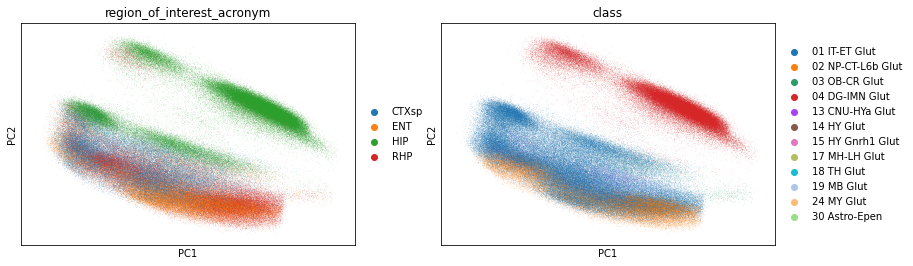

In [47]:
sc.pl.pca(merge,color=['region_of_interest_acronym','class'])

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


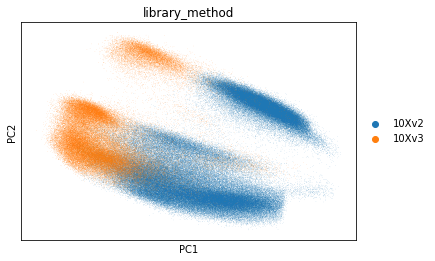

In [48]:
sc.pl.pca(merge,color=['library_method'],show=False)  #肉眼看的话，其实是有批次的，需要去批次？看看uMAP先
plt.savefig("./merge_PCA_batch_effect.png")

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

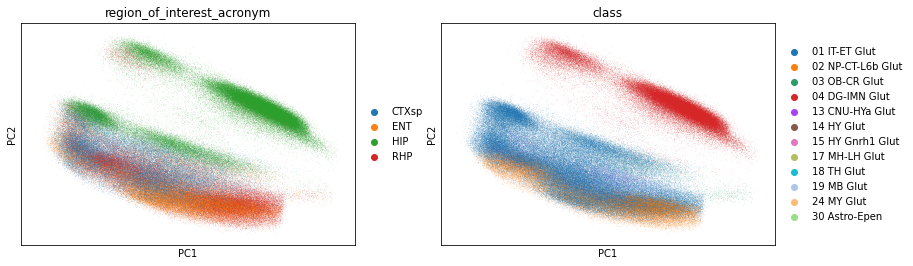

In [49]:
sc.pl.pca(merge,color=['region_of_interest_acronym','class'],show=False)  #如果保存为pdf的话会有十万多个点，确实不太合适
plt.savefig("./merge_PCA.png")

In [43]:
sc.pp.neighbors(merge,n_neighbors=10, n_pcs=40)
sc.tl.umap(merge)

/home/lb4489/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

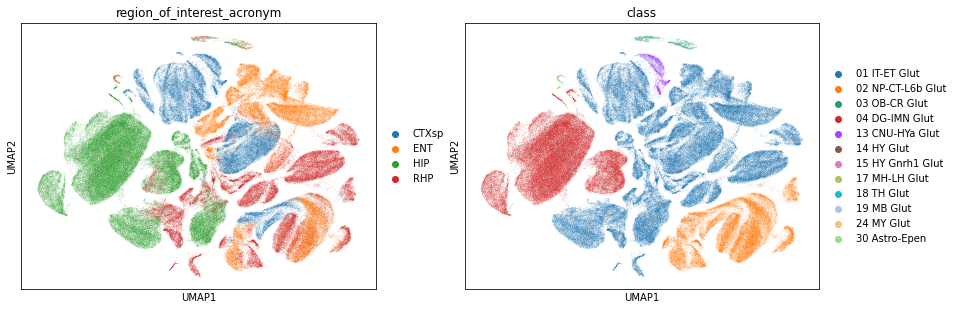

In [44]:
sc.pl.umap(merge,color=['region_of_interest_acronym','class'])

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


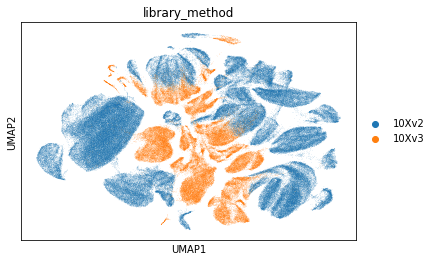

In [51]:
sc.pl.umap(merge,color=['library_method'],show=False)  #好吧uMAP也能看到明显的批次
plt.savefig("./merge_uMAP_batch_effect.png")

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

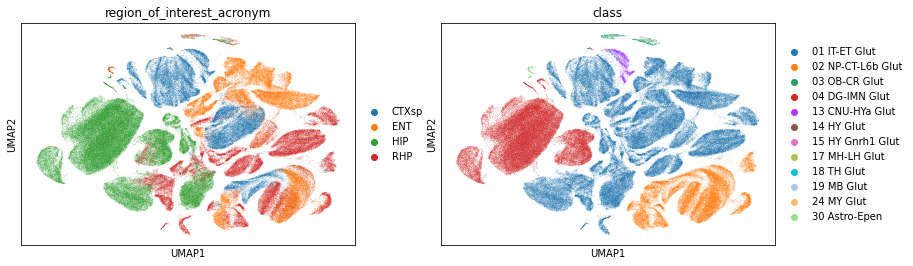

In [46]:
sc.pl.umap(merge,color=['region_of_interest_acronym','class'],show=False)  #如果保存为pdf的话会有十万多个点，确实不太合适
plt.savefig("./merge_uMAP.png")

In [ ]:
# tSNE就实在太慢了
# sc.tl.tsne(asubset)
# sc.pl.tsne(asubset,color='class')

In [50]:
merge.write('merge.h5ad')

In [ ]:
#能不能把DFs标记出来

In [71]:
merge.var.index #不知道为什么把基因symbol给抹掉了，只能用ID了

Index(['ENSMUSG00000051951', 'ENSMUSG00000089699', 'ENSMUSG00000102331',
       'ENSMUSG00000102343', 'ENSMUSG00000025900', 'ENSMUSG00000025902',
       'ENSMUSG00000104238', 'ENSMUSG00000104328', 'ENSMUSG00000033845',
       'ENSMUSG00000025903',
       ...
       'ENSMUSG00000096550', 'ENSMUSG00000094172', 'ENSMUSG00000094887',
       'ENSMUSG00000091585', 'ENSMUSG00000095763', 'ENSMUSG00000095523',
       'ENSMUSG00000095475', 'ENSMUSG00000094855', 'ENSMUSG00000095019',
       'ENSMUSG00000095041'],
      dtype='object', name='gene_identifier', length=32285)

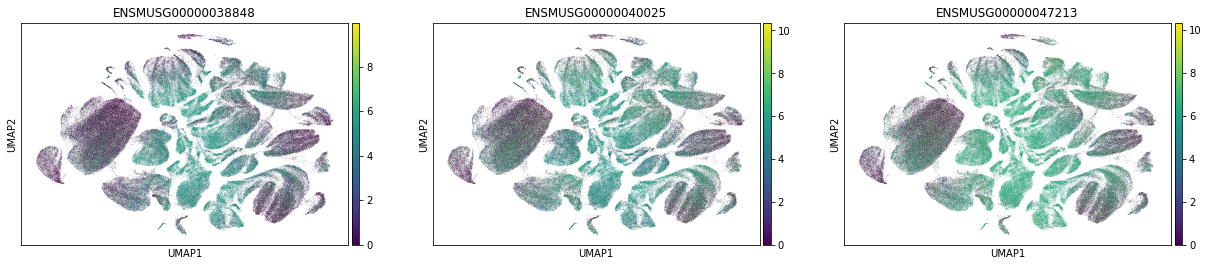

In [52]:
sc.pl.umap(merge,color=['ENSMUSG00000038848','ENSMUSG00000040025','ENSMUSG00000047213']) 

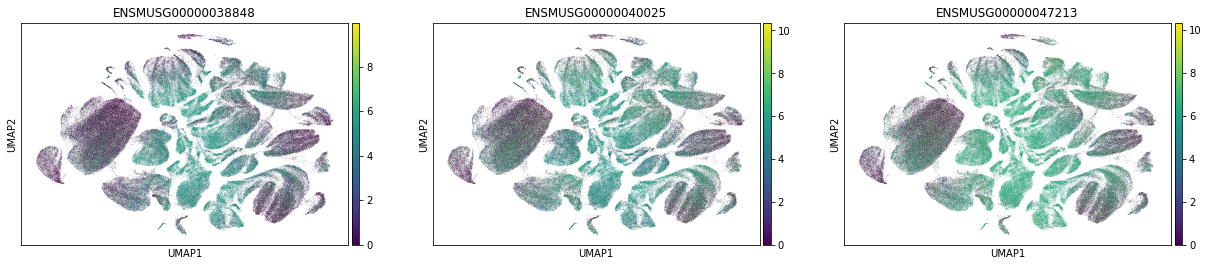

In [53]:
sc.pl.umap(merge,color=['ENSMUSG00000038848','ENSMUSG00000040025','ENSMUSG00000047213'],show=False) 
plt.savefig("./merge_uMAP_DFs.png")

In [ ]:
###########################################################3

In [ ]:
#接下来要做的就是切片，根据基因切成转录因子和RBP的对象

In [86]:
gene = ['ENSMUSG00000038848','ENSMUSG00000040025','ENSMUSG00000047213'] #这了也是需要用ID来进行切片了

pred = [x in gene for x in merge.var.index]
gene_filtered = merge.var[pred]
gene_filtered

start = time.process_time()

test = merge[:,gene_filtered.index].to_memory()

In [87]:
test

AnnData object with n_obs × n_vars = 295582 × 3
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'region_of_interest_acronym', 'cluster_alias', 'class', 'neurotransmitter'
    uns: 'pca', 'region_of_interest_acronym_colors', 'class_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [54]:
tf = pd.read_csv('tf.csv')
id_column_values = tf['id'].tolist()
print(id_column_values[0:5])

['ENSMUSG00000079509', 'ENSMUSG00000045333', 'ENSMUSG00000024238', 'ENSMUSG00000022479', 'ENSMUSG00000026641']


In [55]:
gene = id_column_values #这了也是需要用ID来进行切片了

pred = [x in gene for x in merge.var.index]
gene_filtered = merge.var[pred]
gene_filtered

mergetf = merge[:,gene_filtered.index].to_memory()

In [56]:
mergetf

AnnData object with n_obs × n_vars = 295582 × 1337
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'region_of_interest_acronym', 'cluster_alias', 'class', 'neurotransmitter', 'library_method'
    uns: 'pca', 'neighbors', 'umap', 'region_of_interest_acronym_colors', 'class_colors', 'library_method_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

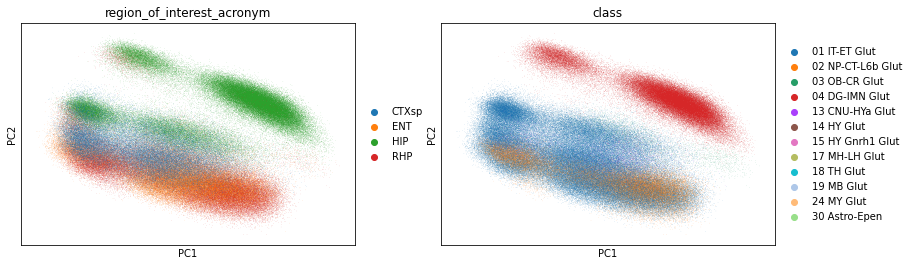

In [57]:
sc.tl.pca(mergetf)
sc.pl.pca(mergetf,color=['region_of_interest_acronym','class'],show=False)  
plt.savefig("./merge_TF_PCA.png")

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

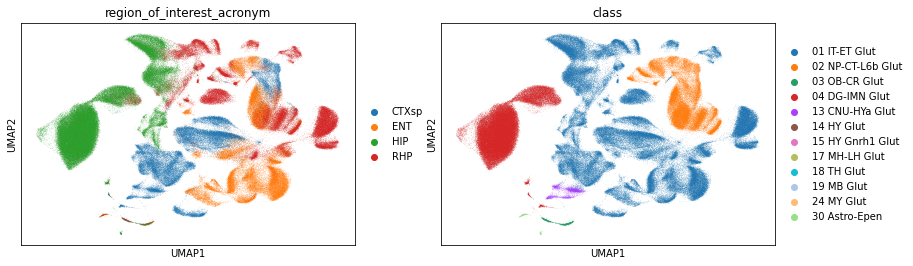

In [58]:
sc.pp.neighbors(mergetf,n_neighbors=10, n_pcs=40)
sc.tl.umap(mergetf)
sc.pl.umap(mergetf,color=['region_of_interest_acronym','class'],show=False)  
plt.savefig("./merge_TF_uMAP.png")

In [59]:
############看看RBP？############

In [60]:
rbp = pd.read_csv('rbp.csv')
id_column_values = rbp['id'].tolist()
print(id_column_values[0:5])

['ENSMUSG00000040028', 'ENSMUSG00000059208', 'ENSMUSG00000004980', 'ENSMUSG00000000568', 'ENSMUSG00000007836']


In [61]:
gene = id_column_values #这了也是需要用ID来进行切片了

pred = [x in gene for x in merge.var.index]
gene_filtered = merge.var[pred]
gene_filtered

mergerbp = merge[:,gene_filtered.index].to_memory()

In [62]:
mergerbp

AnnData object with n_obs × n_vars = 295582 × 2773
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label', 'region_of_interest_acronym', 'cluster_alias', 'class', 'neurotransmitter', 'library_method'
    uns: 'pca', 'neighbors', 'umap', 'region_of_interest_acronym_colors', 'class_colors', 'library_method_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

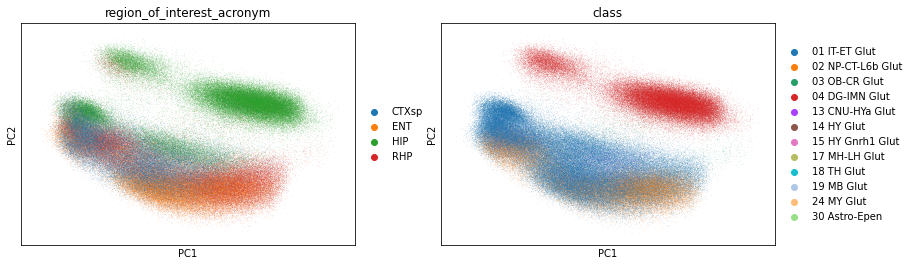

In [63]:
sc.tl.pca(mergerbp)
sc.pl.pca(mergerbp,color=['region_of_interest_acronym','class'],show=False)  
plt.savefig("./merge_RBP_PCA.png")

/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/lb4489/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/lb4489/.local/lib/pyth

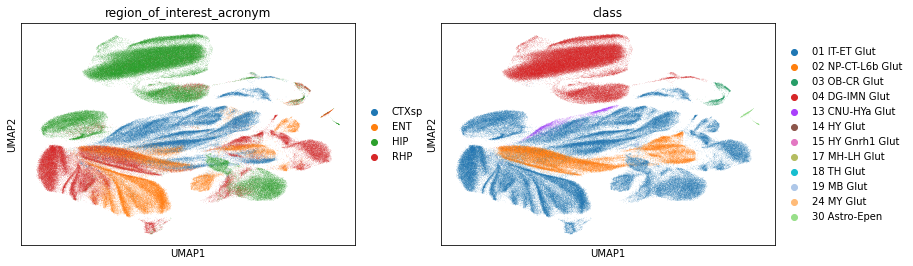

In [64]:
sc.pp.neighbors(mergerbp,n_neighbors=10, n_pcs=40)
sc.tl.umap(mergerbp)
sc.pl.umap(mergerbp,color=['region_of_interest_acronym','class'],show=False)  
plt.savefig("./merge_RBP_uMAP.png")

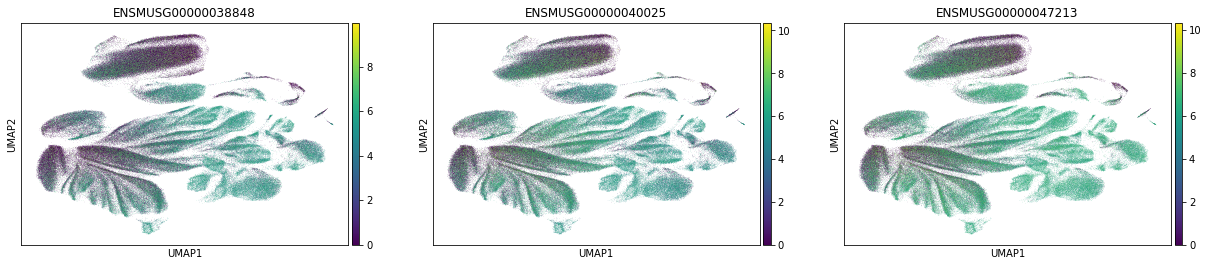

In [65]:
sc.pl.umap(mergerbp,color=['ENSMUSG00000038848','ENSMUSG00000040025','ENSMUSG00000047213'],show=False) 
plt.savefig("./merge_RBP_uMAP_DFs.png")